In [221]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(city_data,ride_data, how = 'inner', on = ["city","city"])
# Display the data table for preview
city_ride_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [222]:
#creating data frames to retrieve critical information
city_ride_data.groupby(["city","type"]).agg({
    "ride_id": "count",
    "fare": "mean",
    "driver_count" : "mean"
}).head()

,,ride_id,fare,driver_count
city,type,,,
Amandaburgh,Urban,18,24.641667,12
Barajasview,Urban,22,25.332273,26
Barronchester,Suburban,16,36.422500,11
Bethanyland,Suburban,18,32.956111,22
Bradshawfurt,Rural,10,40.064000,7


In [223]:
group_df.index.tolist()

[('Amandaburgh', 'Urban'),
 ('Barajasview', 'Urban'),
 ('Barronchester', 'Suburban'),
 ('Bethanyland', 'Suburban'),
 ('Bradshawfurt', 'Rural'),
 ('Brandonfort', 'Suburban'),
 ('Carriemouth', 'Urban'),
 ('Christopherfurt', 'Urban'),
 ('Colemanland', 'Suburban'),
 ('Davidfurt', 'Suburban'),
 ('Deanville', 'Urban'),
 ('East Aaronbury', 'Suburban'),
 ('East Danielview', 'Suburban'),
 ('East Kaylahaven', 'Urban'),
 ('East Kentstad', 'Suburban'),
 ('East Marymouth', 'Suburban'),
 ('Erikaland', 'Urban'),
 ('Garzaport', 'Rural'),
 ('Grahamburgh', 'Urban'),
 ('Grayville', 'Suburban'),
 ('Harringtonfort', 'Rural'),
 ('Huntermouth', 'Urban'),
 ('Hurleymouth', 'Urban'),
 ('Jerryton', 'Urban'),
 ('Jessicaport', 'Rural'),
 ('Johnton', 'Urban'),
 ('Joneschester', 'Urban'),
 ('Josephside', 'Suburban'),
 ('Justinberg', 'Urban'),
 ('Karenberg', 'Urban'),
 ('Karenside', 'Urban'),
 ('Lake Ann', 'Suburban'),
 ('Lake Danielberg', 'Urban'),
 ('Lake Jamie', 'Rural'),
 ('Lake Jonathanshire', 'Urban'),
 ('Lake 

## Bubble Plot of Ride Sharing Data

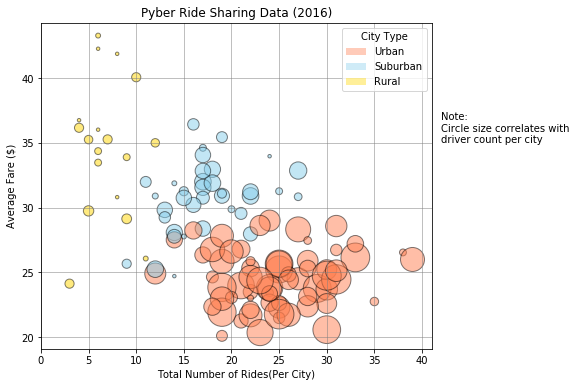

In [237]:
# Obtain the x and y coordinates for each of the three city types
group_df = city_ride_data.groupby(["city","type"]).agg({
    "ride_id": "count",
    "fare": "mean",
    "driver_count" : "mean"
})

#it seems that you cannot pass a column name into the 's' keyword argument
#the following link is where I retreived a workaround--which basically says to just retrieve the column from the dataframe
#and pass it in for 's' 
#https://github.com/pandas-dev/pandas/issues/12466#issuecomment-189450806
city_driver_count = group_df["driver_count"].values

#creating a color map that matches each city type to a color
city_type_list = city_data.sort_values("city")["type"]
city_type_color_map = []
for dev_type in city_type_list:
    if dev_type == "Urban":
        city_type_color_map.append("coral")
    elif dev_type == "Suburban":
        city_type_color_map.append("skyblue")
    else: 
        city_type_color_map.append("gold")
        
# Build the scatter plots for each city types
bubble_chart = group_df.plot(kind="scatter",x="ride_id", y = "fare", s = city_driver_count*12, 
                        c=city_type_color_map, edgecolors ="black",  marker = "o", alpha = 0.5, figsize=(7,6))

# Incorporate the other graph properties
bubble_chart.set_xlabel("Total Number of Rides(Per City)")
bubble_chart.set_ylabel("Average Fare ($)")
bubble_chart.set_xlim(0,group_df["ride_id"].max()+2)
bubble_chart.set_ylim(group_df["fare"].min()-1,group_df["fare"].max()+1)
bubble_chart.grid(linestyle='-', linewidth='0.5', color='grey')
bubble_chart.set_title("Pyber Ride Sharing Data (2016)")

# Create a legend
c_dict = {"Urban": 'coral', "Suburban": 'skyblue', "Rural": 'gold'}
leg_el = [mpatches.Patch(facecolor = value, label = key, alpha = 0.4) for key, value in c_dict.items()]
bubble_chart.legend(title = "City Type",handles = leg_el)

# Incorporate a text label regarding circle size
bubble_chart.text(42,35,"Note: \nCircle size correlates with\ndriver count per city")

bubble_chart.plot()
# Save Figure
plt.savefig("Bubble Chart")

In [238]:
# Show plot
plt.show()

## Total Fares by City Type

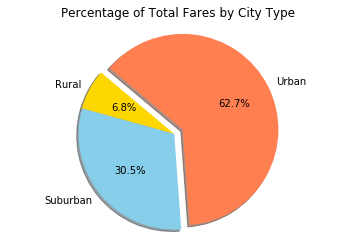

In [262]:
# Calculate Type Percents
total_fares = city_ride_data.groupby("type").sum()["fare"]


# Build Pie Chart

colors = ["gold","skyblue","coral"]
labels = ["Rural","Suburban","Urban"]
explode = [0,0,0.1]


plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Percentage of Total Fares by City Type")
# Save Figure
plt.savefig("TotalFaresPercentage")

In [263]:
# Show Figure
plt.show()

## Total Rides by City Type

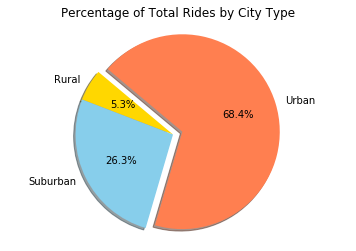

In [264]:
# Calculate Type Percents
total_rides = city_ride_data.groupby("type").count()["ride_id"]


# Build Pie Chart

colors = ["gold","skyblue","coral"]
labels = ["Rural","Suburban","Urban"]
explode = [0,0,0.1]


plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Percentage of Total Rides by City Type")
# Save Figure
plt.savefig("TotalRidesPercentage")

In [265]:
# Show Figure
plt.show()

## Total Drivers by City Type

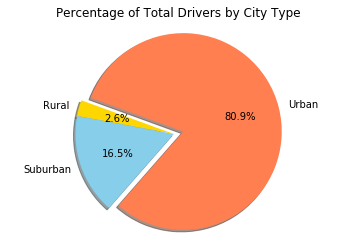

In [283]:
# Calculate Type Percents
total_drivers = city_data.groupby("type").sum()["driver_count"]

#Build Pie Chart

colors = ["gold","skyblue","coral"]
labels = ["Rural","Suburban","Urban"]
explode = [0,0,0.1]


plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

plt.title("Percentage of Total Drivers by City Type")
# Save Figure
plt.savefig("TotalDriversPercentage")

In [284]:
# Show Figure
plt.show()